In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import time

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, classification_report

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("creditcard.csv")

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.drop('Time', axis=1, inplace=True)

In [5]:
df.duplicated(keep ='first').sum()

9144

In [6]:
df[df.duplicated()]

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
33,-0.529912,0.873892,1.347247,0.145457,0.414209,0.100223,0.711206,0.176066,-0.286717,-0.484688,...,0.046949,0.208105,-0.185548,0.001031,0.098816,-0.552904,-0.073288,0.023307,6.14,0
35,-0.535388,0.865268,1.351076,0.147575,0.433680,0.086983,0.693039,0.179742,-0.285642,-0.482474,...,0.049526,0.206537,-0.187108,0.000753,0.098117,-0.553471,-0.078306,0.025427,1.77,0
113,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,-0.243289,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
114,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,-0.243289,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
115,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,-0.243289,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284708,2.018105,0.073226,-1.615154,0.351058,0.333905,-0.676284,0.050474,-0.071028,0.302728,-0.193920,...,-0.306646,-0.841768,0.356773,0.655112,-0.331463,0.144352,-0.069820,-0.039845,1.98,0
284751,2.050734,-0.364010,-2.542843,-0.729357,2.388455,3.318015,-0.479138,0.791559,0.403374,0.093232,...,-0.293363,-0.834802,0.381740,0.698179,-0.264798,0.219275,-0.052131,-0.066940,0.89,0
284775,1.955547,-0.724606,-1.706511,-0.611145,1.710907,3.914215,-1.248690,1.054133,1.314064,-0.150553,...,0.193605,0.690196,0.155951,0.726775,-0.061219,-0.192666,0.060347,-0.042323,12.99,0
284785,0.032887,0.545338,-1.185844,-1.729828,2.932315,3.401529,0.337434,0.925377,-0.165663,-0.386953,...,-0.266113,-0.716336,0.108519,0.688519,-0.460220,0.161939,0.265368,0.090245,1.79,0


In [7]:
df[33:40]

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
33,-0.529912,0.873892,1.347247,0.145457,0.414209,0.100223,0.711206,0.176066,-0.286717,-0.484688,...,0.046949,0.208105,-0.185548,0.001031,0.098816,-0.552904,-0.073288,0.023307,6.14,0
34,-0.535388,0.865268,1.351076,0.147575,0.433680,0.086983,0.693039,0.179742,-0.285642,-0.482474,...,0.049526,0.206537,-0.187108,0.000753,0.098117,-0.553471,-0.078306,0.025427,1.77,0
35,-0.535388,0.865268,1.351076,0.147575,0.433680,0.086983,0.693039,0.179742,-0.285642,-0.482474,...,0.049526,0.206537,-0.187108,0.000753,0.098117,-0.553471,-0.078306,0.025427,1.77,0
36,-0.246046,0.473267,1.695738,0.262411,-0.010866,-0.610836,0.793937,-0.247253,0.138879,-0.401007,...,-0.194600,-0.335133,-0.078180,0.392784,-0.031157,0.198037,-0.175347,-0.203616,30.49,0
37,-1.452187,1.765124,0.611669,1.176825,-0.445980,0.246826,-0.257566,1.092472,-0.607524,0.047156,...,0.082280,0.325782,-0.069107,0.020962,-0.044668,-0.243441,0.149180,0.120557,1.80,0
38,0.996370,-0.122589,0.546819,0.706580,0.134560,1.156995,-0.294561,0.407429,0.337863,-0.408150,...,-0.076302,0.108867,0.162231,-0.575624,0.109795,0.373813,0.050552,0.005106,20.53,0
39,1.110880,0.168717,0.517144,1.325407,-0.191573,0.019504,-0.031849,0.117620,0.017665,0.044865,...,-0.037709,0.095701,-0.048198,0.232115,0.606201,-0.342097,0.036770,0.007480,6.54,0


In [8]:
df.shape

(284807, 30)

In [9]:
nonfraud_count = len(df[df.Class == 0])
fraud_count = len(df[df.Class == 1])
fraud_percentage = round(nonfraud_count/fraud_count)*100

print('Cases')
print('---------------------------')
print('Total Non-Fraud_count is:-', nonfraud_count)
print('Total Fraud_count is:-', fraud_count)

Cases
---------------------------
Total Non-Fraud_count is:- 284315
Total Fraud_count is:- 492


In [10]:
false = df[df['Class']==1]
true = df[df['Class']==0]

#false detection case

print('False Detection Class')
print("---------------------")
print(false.Amount.describe(), "\n")

#true detection case

print('True Detection Class')
print("---------------------")
print(true.Amount.describe(), "\n")

False Detection Class
---------------------
count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64 

True Detection Class
---------------------
count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64 



In [11]:
#check columns

print("Columns or Feature names :-", df.columns)


Columns or Feature names :- Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class'],
      dtype='object')


In [12]:
#check unique values of target variable

print("Unique values of target variable :-", df['Class'].unique())

Unique values of target variable :- [0 1]


In [13]:
#check number of samples under target column

print("Number of sample under each target value :- \n",df['Class'].value_counts())

Number of sample under each target value :- 
 0    284315
1       492
Name: Class, dtype: int64


In [14]:
#Checking null values

df.isnull().sum()

V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

# Data Transformation


In [15]:
#data transfarmation
sc = StandardScaler()
amount = df['Amount'].values

df['Amount'] = sc.fit_transform(amount.reshape(-1,1))

In [16]:
print(df['Amount'].head())

0    0.244964
1   -0.342475
2    1.160686
3    0.140534
4   -0.073403
Name: Amount, dtype: float64


# Splitting Dataset

In [17]:
#splitting data set
X = df.drop('Class', axis=1).values
y = df['Class'].values

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=0)

In [19]:
print('X_train Samples :-', X_train[:1])

X_train Samples :- [[-1.11504743  1.03558276  0.80071244 -1.06039825  0.03262117  0.85342216
  -0.61424348 -3.23116112  1.53994798 -0.81690879 -1.30559201  0.1081772
  -0.85960958 -0.07193421  0.90665563 -1.72092961  0.79785322 -0.0067594
   1.95677806 -0.64489557  3.02038533 -0.53961798  0.03315649 -0.77494577
   0.10586781 -0.43085348  0.22973694 -0.0705913  -0.30145418]]


In [20]:
print('X_test Samples :-', X_train[0:1])

X_test Samples :- [[-1.11504743  1.03558276  0.80071244 -1.06039825  0.03262117  0.85342216
  -0.61424348 -3.23116112  1.53994798 -0.81690879 -1.30559201  0.1081772
  -0.85960958 -0.07193421  0.90665563 -1.72092961  0.79785322 -0.0067594
   1.95677806 -0.64489557  3.02038533 -0.53961798  0.03315649 -0.77494577
   0.10586781 -0.43085348  0.22973694 -0.0705913  -0.30145418]]


In [21]:
print('y_train Samples :-', y_train[0:70])

y_train Samples :- [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [22]:
print('y_test Samples :-', y_test[0:30])


y_test Samples :- [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [23]:
print('Shape of X_Train dataset')
print('----------------------')
print(X_train.shape)

print('Shape of y_Train dataset')
print('----------------------')
print(y_train.shape)


print('Shape of X_Test dataset')
print('----------------------')
print(X_test.shape)

print('Shape of y_Test dataset')
print('----------------------')
print(y_test.shape)

Shape of X_Train dataset
----------------------
(227845, 29)
Shape of y_Train dataset
----------------------
(227845,)
Shape of X_Test dataset
----------------------
(56962, 29)
Shape of y_Test dataset
----------------------
(56962,)


# Modeling

# Decision Tree

In [24]:
tree_model = DecisionTreeClassifier(max_depth=6, criterion='entropy')
tree_model.fit(X_train, y_train)
tree_pred = tree_model.predict(X_test)

In [25]:
print('-----------Accuracy Score-----------')
print('Accuracy score of the decision tree', (accuracy_score(y_test, tree_pred)))

-----------Accuracy Score-----------
Accuracy score of the decision tree 0.999385555282469


In [26]:
print('-----------F1 Score-----------')
print('F1 score of the decision tree', (f1_score(y_test, tree_pred)))

-----------F1 Score-----------
F1 score of the decision tree 0.8186528497409327


In [27]:
print('-----------Confusion Matrix-----------')
print('Confusion Matrix of the decision tree :- \n', (confusion_matrix(y_test, tree_pred)))

-----------Confusion Matrix-----------
Confusion Matrix of the decision tree :- 
 [[56848    13]
 [   22    79]]


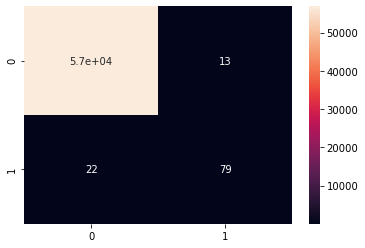

In [28]:
cm = confusion_matrix(y_test, tree_pred)
fig, ax = plt.subplots(figsize=(6,4))
sns.heatmap(cm, annot=True)
plt.show()

In [29]:
print('-----------Classification Report-----------')
print('Confusion Matrix of the decision tree :- \n', (classification_report(y_test, tree_pred)))

-----------Classification Report-----------
Confusion Matrix of the decision tree :- 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56861
           1       0.86      0.78      0.82       101

    accuracy                           1.00     56962
   macro avg       0.93      0.89      0.91     56962
weighted avg       1.00      1.00      1.00     56962



# Logistic Regression

In [30]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

In [31]:
print('-----------Accuracy Score-----------')
print('Accuracy score of the Logistic Regression', (accuracy_score(y_test, lr_pred)))

-----------Accuracy Score-----------
Accuracy score of the Logistic Regression 0.9991924440855307


In [32]:
print('-----------F1 Score-----------')
print('F1 score of the logistic regression', (f1_score(y_test, lr_pred)))

-----------F1 Score-----------
F1 score of the logistic regression 0.7356321839080459


In [33]:
print('-----------Confusion Matrix-----------')
print('Confusion Matrix of the logistic regression :- \n', (confusion_matrix(y_test, lr_pred)))

-----------Confusion Matrix-----------
Confusion Matrix of the logistic regression :- 
 [[56852     9]
 [   37    64]]


In [34]:
print('logistic Regression classification :-\n',(classification_report(y_test, lr_pred)))


logistic Regression classification :-
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56861
           1       0.88      0.63      0.74       101

    accuracy                           1.00     56962
   macro avg       0.94      0.82      0.87     56962
weighted avg       1.00      1.00      1.00     56962



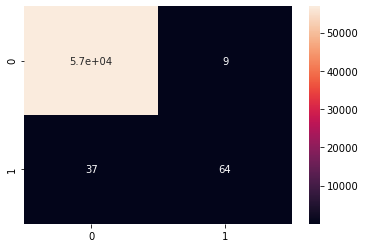

In [35]:
cm = confusion_matrix(y_test, lr_pred)
fig, ax = plt.subplots(figsize=(6,4))
sns.heatmap(cm, annot=True)
plt.show()

# Random Forest

In [36]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

In [37]:
print('-----------Accuracy Score-----------')
print('Accuracy score of the Random Forest', (accuracy_score(y_test, rf_pred)))

-----------Accuracy Score-----------
Accuracy score of the Random Forest 0.9995259997893332


In [38]:
print('-----------F1 Score-----------')
print('F1 score of the random forest', (f1_score(y_test, rf_pred)))

-----------F1 Score-----------
F1 score of the random forest 0.8571428571428572


In [39]:
print('-----------Confusion Matrix-----------')
print('Confusion Matrix of the random forest :- \n', (confusion_matrix(y_test, rf_pred)))

-----------Confusion Matrix-----------
Confusion Matrix of the random forest :- 
 [[56854     7]
 [   20    81]]


In [40]:
print('-----------Classification Report-----------')
print('Confusion Matrix of the random forest :- \n', (classification_report(y_test, rf_pred)))

-----------Classification Report-----------
Confusion Matrix of the random forest :- 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56861
           1       0.92      0.80      0.86       101

    accuracy                           1.00     56962
   macro avg       0.96      0.90      0.93     56962
weighted avg       1.00      1.00      1.00     56962



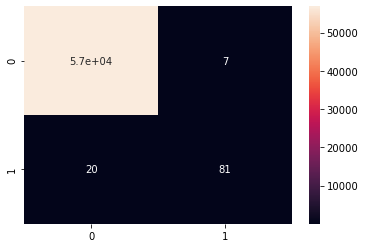

In [41]:
cm = confusion_matrix(y_test, rf_pred)
fig, ax = plt.subplots(figsize=(6,4))
sns.heatmap(cm, annot=True)
plt.show()

# Support Vector Machine

In [43]:
sv = SVC()
sv.fit(X_train, y_train)
sv_pred = sv.predict(X_test)

In [44]:
print('----------Accuracy score---------')
print('accuracy score of SVM',(accuracy_score(y_test,sv_pred)))

----------Accuracy score---------
accuracy score of SVM 0.9993153330290369


In [45]:
print('----------F1 score---------')
print('F1 score of SVM', (f1_score(y_test, sv_pred)))

----------F1 score---------
F1 score of SVM 0.7771428571428572


In [46]:
print('----------Confusion Matrix--------')
print('confusion matrix of SVM:- \n', (confusion_matrix(y_test, sv_pred)))

----------Confusion Matrix--------
confusion matrix of SVM:- 
 [[56855     6]
 [   33    68]]


In [47]:
print("SVM classification report :-\n", (classification_report(y_test, sv_pred)))

SVM classification report :-
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56861
           1       0.92      0.67      0.78       101

    accuracy                           1.00     56962
   macro avg       0.96      0.84      0.89     56962
weighted avg       1.00      1.00      1.00     56962



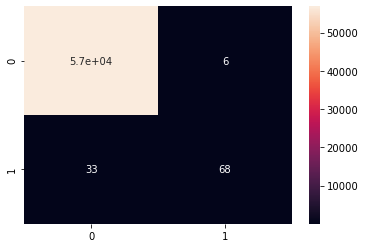

In [48]:
cm = confusion_matrix(y_test, sv_pred)
fig, ax = plt.subplots(figsize=(6,4))
sns.heatmap(cm, annot=True)
plt.show()

# K-NN

In [49]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

In [50]:
print('-------Accuracy Score-------')
print('accuracy score of KNN is',(accuracy_score(y_test,knn_pred)))

-------Accuracy Score-------
accuracy score of KNN is 0.9995259997893332


In [51]:
print('------F1 Score------------')
print('F1 score of KNN is',(f1_score(y_test,knn_pred)))

------F1 Score------------
F1 score of KNN is 0.8571428571428572


In [52]:
print('------Confusion Matrix--------')
print('Confusion Matrix of KNN is :- \n',(confusion_matrix(y_test, knn_pred)))

------Confusion Matrix--------
Confusion Matrix of KNN is :- 
 [[56854     7]
 [   20    81]]


In [53]:
print('confusion matrix of knn classification report :- \n ', (classification_report(y_test,knn_pred)))

confusion matrix of knn classification report :- 
                precision    recall  f1-score   support

           0       1.00      1.00      1.00     56861
           1       0.92      0.80      0.86       101

    accuracy                           1.00     56962
   macro avg       0.96      0.90      0.93     56962
weighted avg       1.00      1.00      1.00     56962



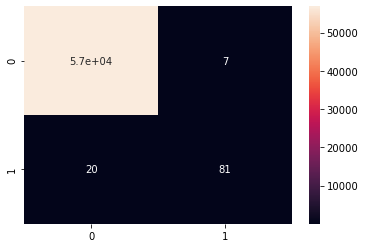

In [54]:
cm = confusion_matrix(y_test,knn_pred)
fig, ax = plt.subplots(figsize = (6,4))
sns.heatmap(cm, annot = True)
plt.show()

# ROC - AUC Curve

In [55]:
from sklearn.metrics import roc_auc_score, roc_curve

# Decision Tree ROC-AUC Curve

In [56]:
score = roc_auc_score(y_test, tree_pred)

In [57]:
print('ROC-AUC Score is:-', score)

ROC-AUC Score is:- 0.8909747950578107


In [58]:
fpr, tpr, thresholds = roc_curve(y_test, tree_pred)

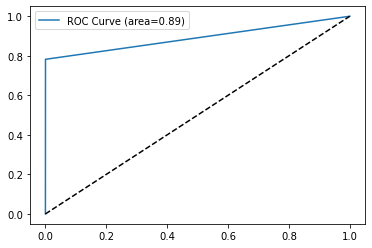

In [59]:
plt.plot(fpr, tpr, label='ROC Curve (area=%0.2f)' % score)
plt.plot([0,1], [0,1], 'k--')
plt.legend()
plt.show()

# Random Forest

In [60]:
rf_score = roc_auc_score(y_test, rf_pred)
print('ROC-AUC Score is:-', rf_score)

ROC-AUC Score is:- 0.9009285453967039


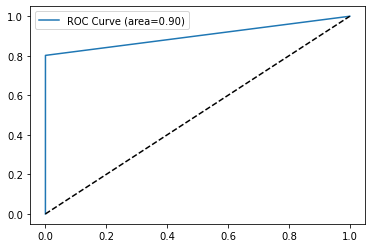

In [61]:
fpr, tpr, thresholds = roc_curve(y_test, rf_pred)
plt.plot(fpr, tpr, label='ROC Curve (area=%0.2f)' % rf_score)
plt.plot([0,1], [0,1], 'k--')
plt.legend()
plt.show()

# SVM ROC_AUC Curve

In [62]:
from sklearn.metrics import roc_auc_score, roc_curve

In [63]:
sv_score = roc_auc_score(y_test, sv_pred)
print('ROC-AUC Score is:-', sv_score)

ROC-AUC Score is:- 0.8365809031264535


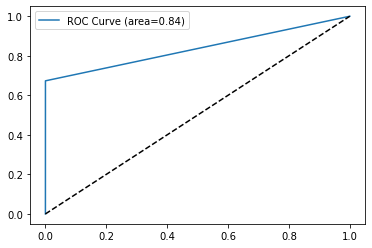

In [64]:
fpr, tpr, thresholds = roc_curve(y_test, sv_pred)
plt.plot(fpr, tpr, label='ROC Curve (area=%0.2f)' % sv_score)
plt.plot([0,1], [0,1], 'k--')
plt.legend()
plt.show()

# K-NN ROC_AUC Curve

In [65]:
knn_score = roc_auc_score(y_test, knn_pred)
print('ROC-AUC Score is:-', knn_score)

ROC-AUC Score is:- 0.9009285453967039


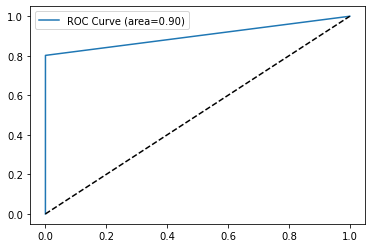

In [66]:
fpr, tpr, thresholds = roc_curve(y_test, knn_pred)
plt.plot(fpr, tpr, label='ROC Curve (area=%0.2f)' % knn_score)
plt.plot([0,1], [0,1], 'k--')
plt.legend()
plt.show()

# Logistic Regression ROC_AUC Curve

In [67]:
lr_score = roc_auc_score(y_test, sv_pred)
print('ROC-AUC Score is:-', lr_score)

ROC-AUC Score is:- 0.8365809031264535


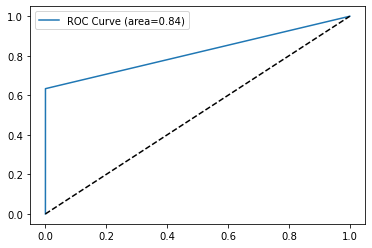

In [68]:
fpr, tpr, thresholds = roc_curve(y_test, lr_pred)
plt.plot(fpr, tpr, label='ROC Curve (area=%0.2f)' % sv_score)
plt.plot([0,1], [0,1], 'k--')
plt.legend()
plt.show()

# Traing Time

In [69]:
#Logistic Regression Classifier
from sklearn.linear_model import LogisticRegression
import time
classifier = LogisticRegression(random_state = 0) 
start = time.time()
classifier.fit(X_train,y_train) 
stop = time.time()
print(f"Training time: {stop - start}s")

Training time: 1.5567049980163574s


In [70]:
#K-nn classifier
from sklearn.neighbors import KNeighborsClassifier
import time
classifier = KNeighborsClassifier() 
start = time.time()
classifier.fit(X_train,y_train) 
stop = time.time()
print(f"Training time: {stop - start}s")

Training time: 0.035440921783447266s


In [71]:
#Create a RandomForest Classifier
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier()
start = time.time()
#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)
stop = time.time()
print(f"Training time: {stop - start}s")

Training time: 177.59364819526672s


In [72]:
#Support Vector Classifier 
from sklearn.svm import SVC 
clf = SVC(kernel='linear') 
start = time.time() 
# fitting x samples and y classes 
clf.fit(X_train,y_train)
stop = time.time()
print(f"Training time: {stop - start}s") 

Training time: 5334.310283899307s


In [73]:
# Create Decision Tree classifier object
import time
clf = DecisionTreeClassifier()
# Train Decision Tree Classifier
start = time.time()
clf = clf.fit(X_train,y_train)
stop = time.time()
print(f"Training time: {stop - start}s")

Training time: 28.794553518295288s
